In [1]:
%reset -f
from A_Functions import *

In [2]:
# Create Noise Type
# Give a name for your noise - be precise to make it easy to detect what type it is
# Example 'NoiseConst_2nA' or 'NoiseDS_2A10Hz_9A1Hz'
namenoise = 'Plasticity_Rule_test'

# extra step to make a new file with the same name only with 'SimParams.mat' added
#simparameter=list(namenoise)
#simparameter.append('_SimParams.mat')
#simparameter="".join(simparameter)

## input of NoiseGenerator for double sine is :
# (amount of noise sources, 'DS', [offset sine1,offset sine2,amplitude sine1 (nA), frequency sine1(Hz),,
#amplitude sine2, frequency sine2], duration in ms, name of the file)

## input of NoiseGenerator for OU is :
# (amount of noise sources, 'OU', [initial I, initial I0, sigma], duration in ms, name of the file)

## input of NoiseGenerator Constant value :
# (amount, 'const',[constant value in nA], duration in ms, name of the file)

Noise_t,Noise_I,N_Noise=NoiseGenerator(2,'DS',[0.2,0.2     # offset in nA
                                               ,0.0,0.0 # amplitude in nA
                                               ,2,20   # frequency in Hz
                                              ],20000,namenoise)

#Noise_t,Noise_I,N_Noise=NoiseGenerator(5,'DS',[1 ,0.5, 0, -0.5, -1,     #offsets in nA
#                                              1, 0.5, 0, 0.5, 1, #amplitude in nA
#                                              20, 2, 2, 20, 2]         # frequency in Hz
#                                              ,2500,namenoise,simparameter)

#Noise_const15 = NoiseGenerator(2,'const',[1.5],10,'Noise_const15')


Noise input is of type double sine
Data is saved


In [3]:
SimParams = {}
######################## Save
SimParams['saving'] = 'yes' #'yes','no'
######################## plot
SimParams['plotting'] = 'yes' #'yes','no'
######################## Experiment length
SimParams['dt'] = 0.025*ms
SimParams['exp_runtime'] = asarray(size(Noise_t)*SimParams['dt'])
#print(type(SimParams['exp_runtime']*second))
######################## Neuronal responses to run. 
SimParams['IO_response']='both' #'oscillatory', 'non', 'spiking', 'both' 
SimParams['N_Cells_PC'] = 10
SimParams['N_Cells_DCN'] = 20
SimParams['N_Cells_IO'] = 20
name = namenoise+'SimParam.pickle'
print(SimParams)
######################## Saving SimParams
with open(name, 'wb') as sims:
    pickle.dump(SimParams,sims, pickle.HIGHEST_PROTOCOL)
#sio.savemat('SimParams.mat', mdict={'SimParams': SimParams})


{'saving': 'yes', 'plotting': 'yes', 'dt': 25. * usecond, 'exp_runtime': array(20.), 'IO_response': 'both', 'N_Cells_PC': 10, 'N_Cells_DCN': 20, 'N_Cells_IO': 20}


In [4]:
#from E_Synapses_NoPlasticity import *
from E_New_Plasticity import *
#visualise(S_Coupled_noSTDP)
#visualise(DCN_PC_Synapse_Coupled_noSTDP)
#visualise(DCN_PC_Synapse_Uncoupled_noSTD

loading went fine
intrinsic current = <PC_Uncoupled_STDP.I_intrinsic: array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]) * namp>
number of IO 20
nr of noise is 2
offset [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2] ampl [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] freq [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20.]


WARNING    C:\Users\thoed\OneDrive\Documenten\Universiteit_Delft\master\TheModelPlasticity\ModelPlasticity\E_Synapses_Plasticity.py:134: RuntimeWarning: invalid value encountered in true_divide
  reshaped_weight = norm_coupled/ column_sum[np.newaxis,:]
 [py.warnings]


final static weights STDP [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
new weights <dummy_Coupled.weight: array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])>


WARNING    The expression "(conn_target - noise_source) / N_Cells_PC" divides two integer values. In previous versions of Brian, this would have used either an integer ("flooring") or a floating point division, depending on the Python version and the code generation target. In the current version, it always uses a floating point division. Explicitly ask for an  integer division ("//"), or turn one of the operands into a floating point value (e.g. replace "1/2" by "1.0/2") to no longer receive this warning. [brian2.parsing.bast.floating_point_division]


offset [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2] ampl [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] freq [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20.]
final static weights uncoupled STDP [0.52631579 0.47368421 0.47058824 0.46666667 0.46153846 0.45454545
 0.44444444 0.42857143 0.4        0.33333333 0.47368421 0.52631579
 0.52941176 0.53333333 0.53846154 0.54545455 0.55555556 0.57142857
 0.6        0.66666667]
Synapses(clock=Clock(dt=25. * usecond, name='dummy_PC_Uncoupled_clock'), when=start, order=0, name='dummy_PC_Uncoupled')


In [5]:
run(exp_runtime,report='text')

Starting simulation at t=0. s for a duration of 20. s
0.402025 s (2%) simulated in 10s, estimated 8m 8s remaining.
0.77025 s (3%) simulated in 20s, estimated 8m 20s remaining.
1.091025 s (5%) simulated in 30s, estimated 8m 40s remaining.
1.339025 s (6%) simulated in 40s, estimated 9m 18s remaining.
1.586025 s (7%) simulated in 50s, estimated 9m 41s remaining.
1.830775 s (9%) simulated in 1m 0s, estimated 9m 56s remaining.
2.0768 s (10%) simulated in 1m 10s, estimated 10m 5s remaining.
2.319025 s (11%) simulated in 1m 20s, estimated 10m 10s remaining.
2.547025 s (12%) simulated in 1m 30s, estimated 10m 17s remaining.
2.790025 s (13%) simulated in 1m 40s, estimated 10m 17s remaining.
3.026025 s (15%) simulated in 1m 50s, estimated 10m 18s remaining.
3.261025 s (16%) simulated in 2m 0s, estimated 10m 17s remaining.
3.4991 s (17%) simulated in 2m 10s, estimated 10m 14s remaining.
3.7549 s (18%) simulated in 2m 20s, estimated 10m 6s remaining.
3.991025 s (19%) simulated in 2m 30s, estimated

In [6]:
#run(exp_runtime,report='text')

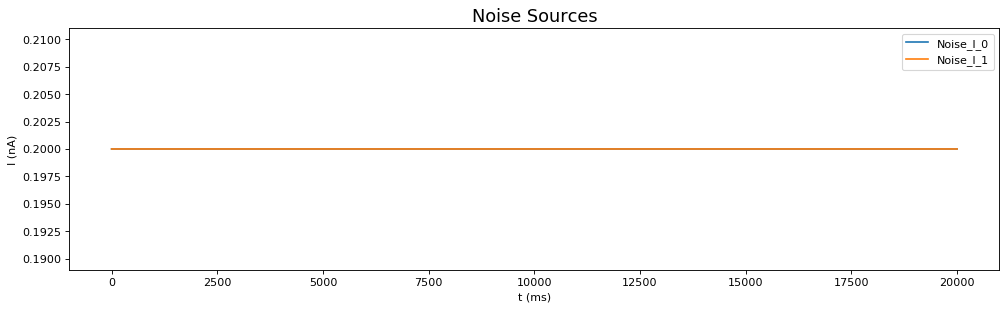

Plasticity


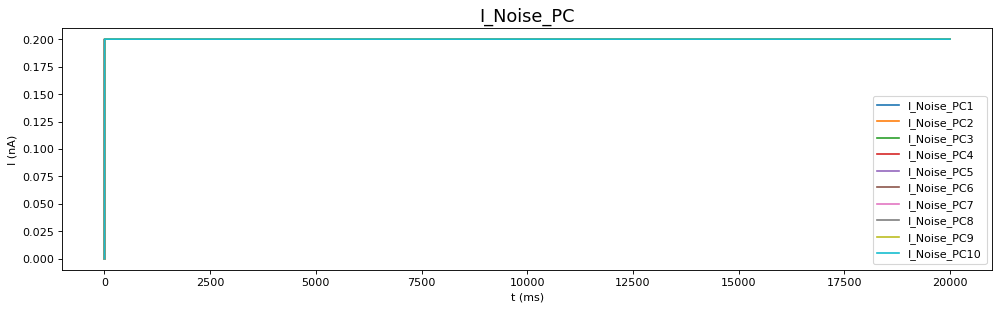

Plasticity Coupled Scenario


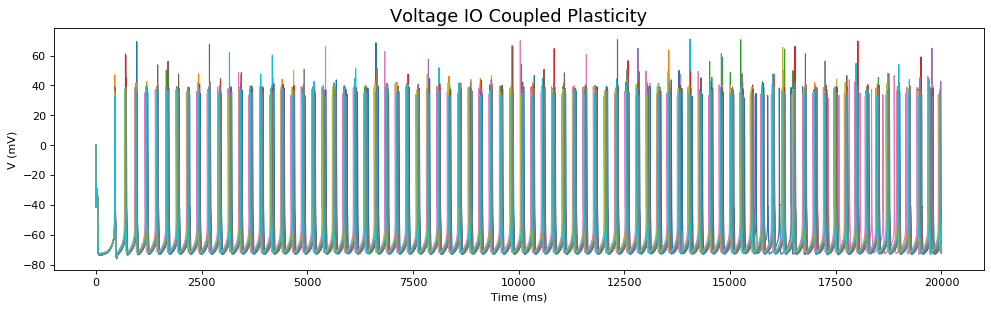

Number of spikes DCN: 613
Number of spikes DCN: 839
Number of spikes DCN: 645
Number of spikes DCN: 607
Number of spikes DCN: 627
Number of spikes DCN: 609
Number of spikes DCN: 685
Number of spikes DCN: 726
Number of spikes DCN: 604
Number of spikes DCN: 716


WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


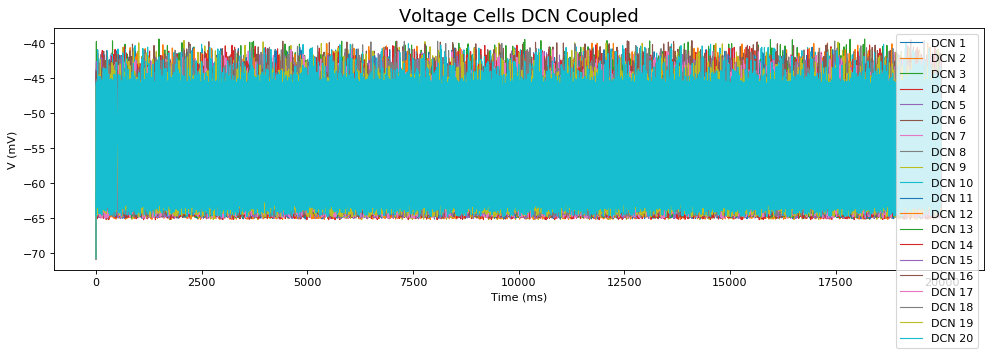

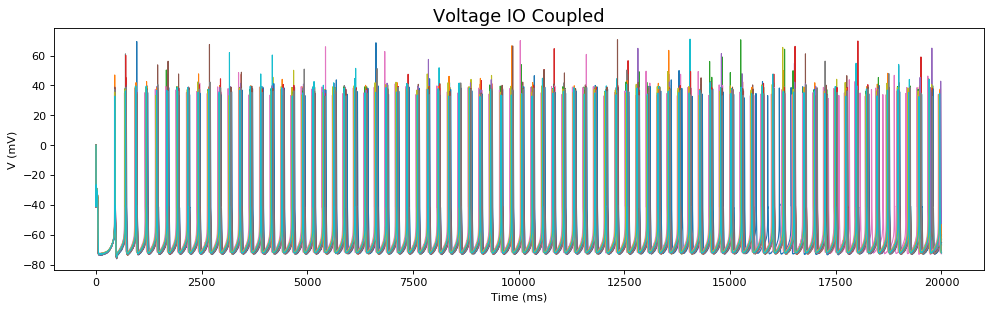

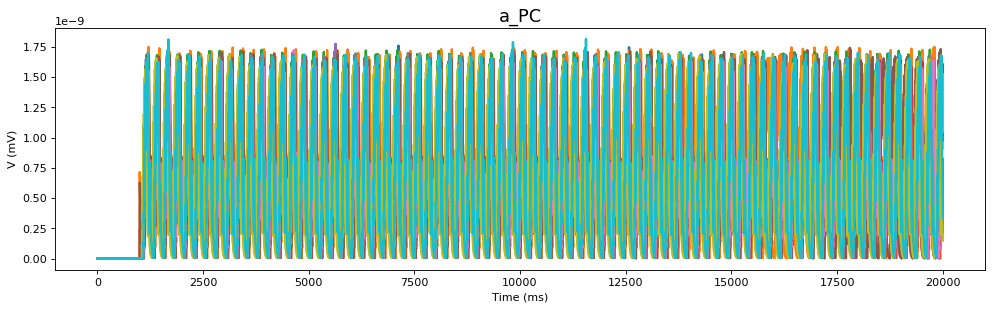

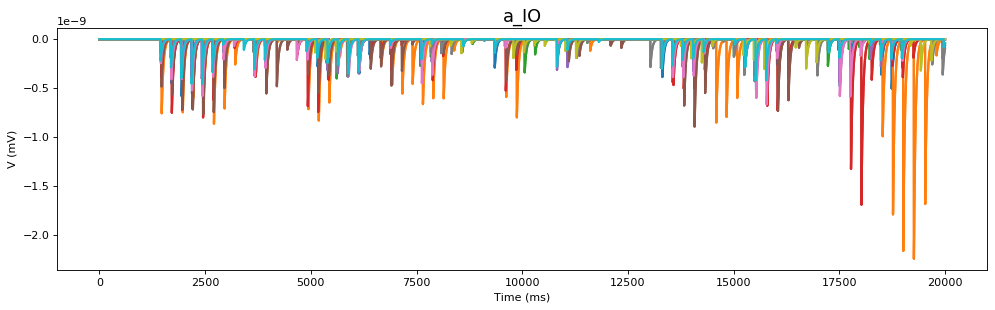

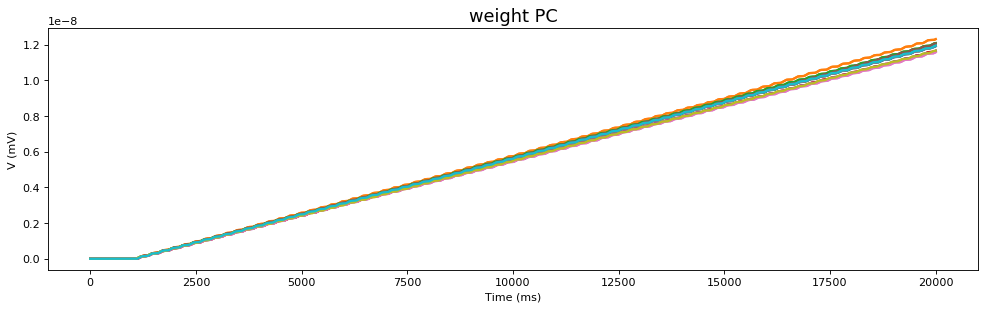

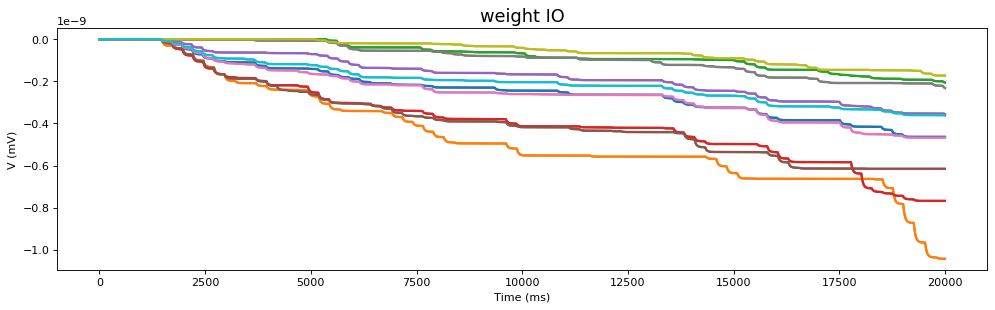

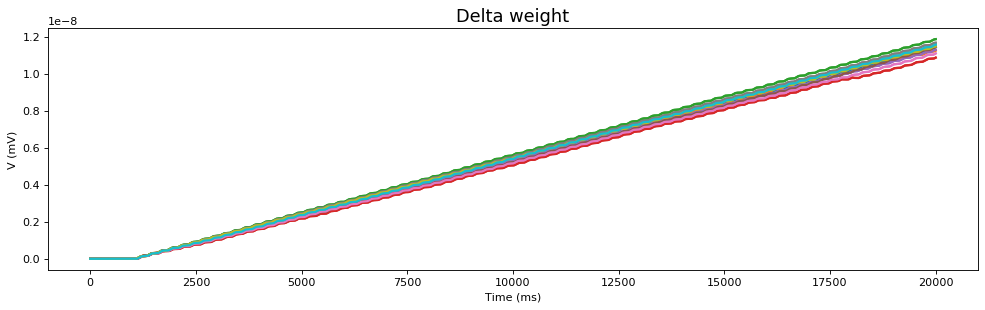

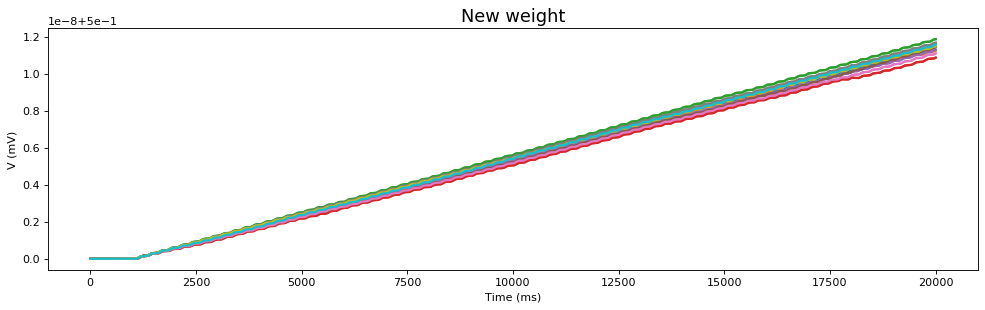

Plasticity Uncoupled Scenario


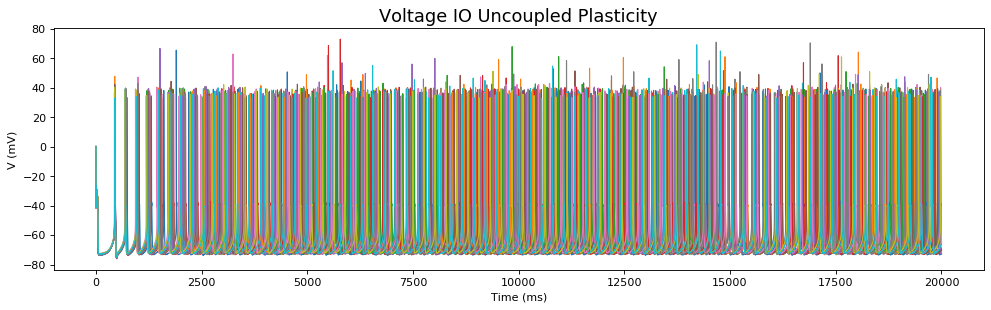

Number of spikes DCN: 603
Number of spikes DCN: 760
Number of spikes DCN: 636
Number of spikes DCN: 596
Number of spikes DCN: 619
Number of spikes DCN: 599
Number of spikes DCN: 683
Number of spikes DCN: 713
Number of spikes DCN: 595
Number of spikes DCN: 713


WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


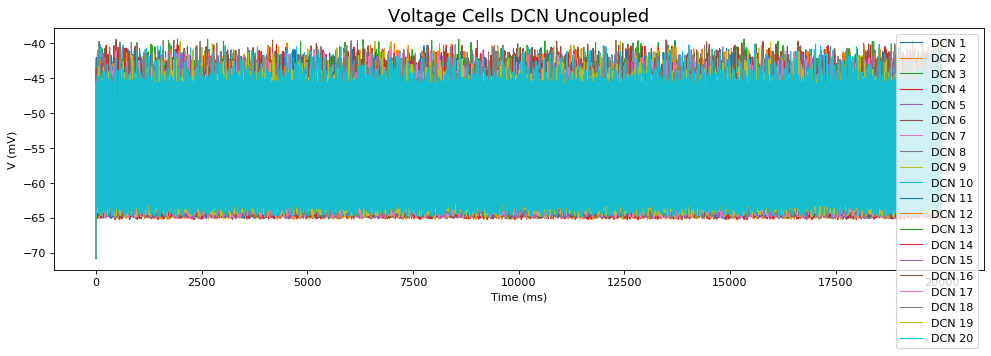

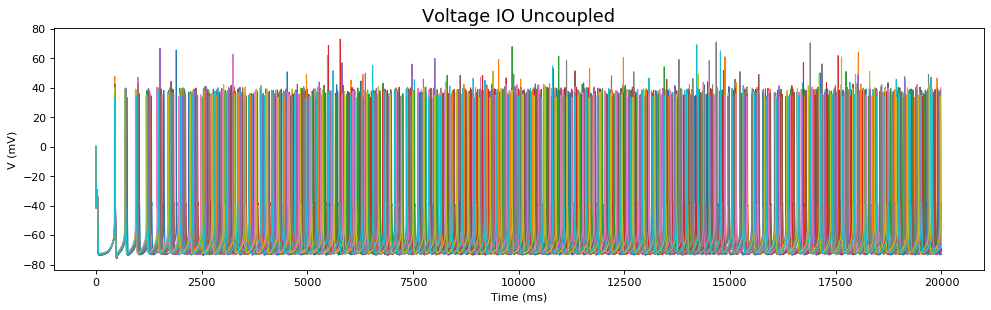

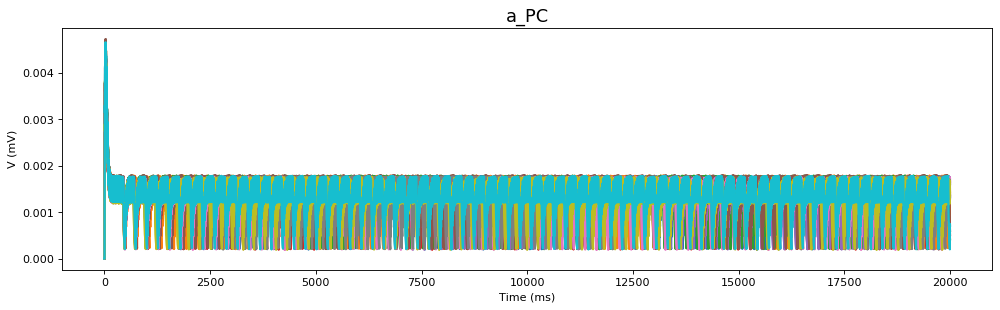

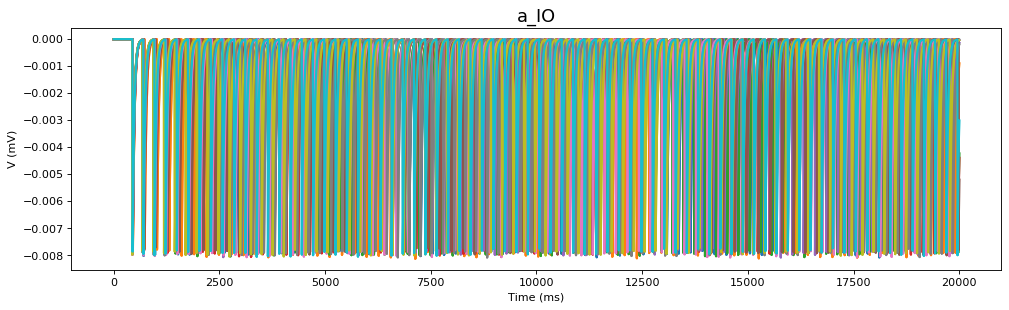

<Figure size 1200x320 with 0 Axes>

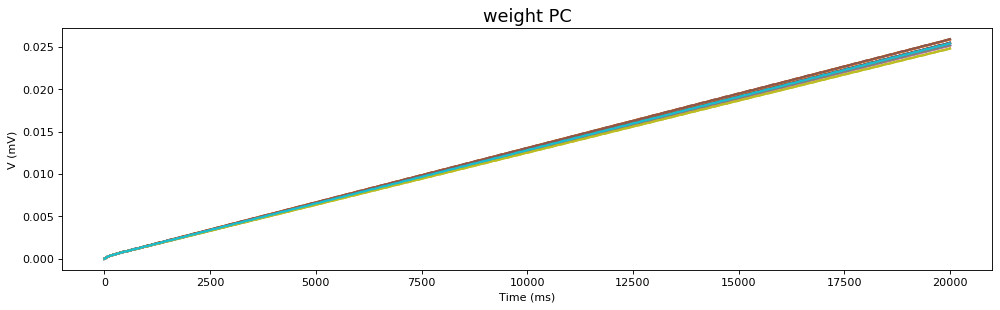

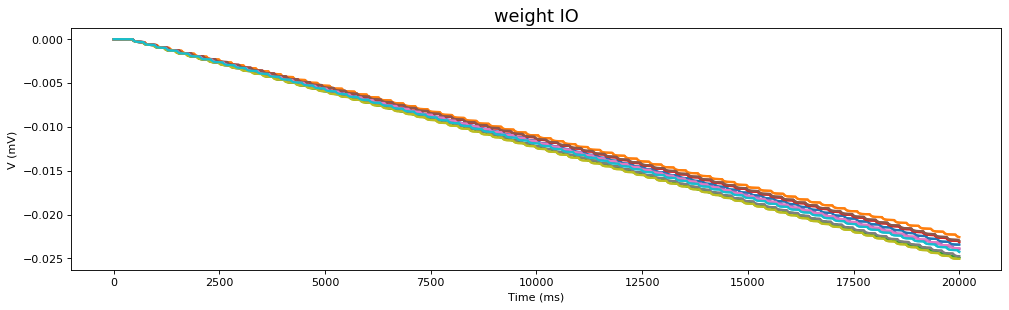

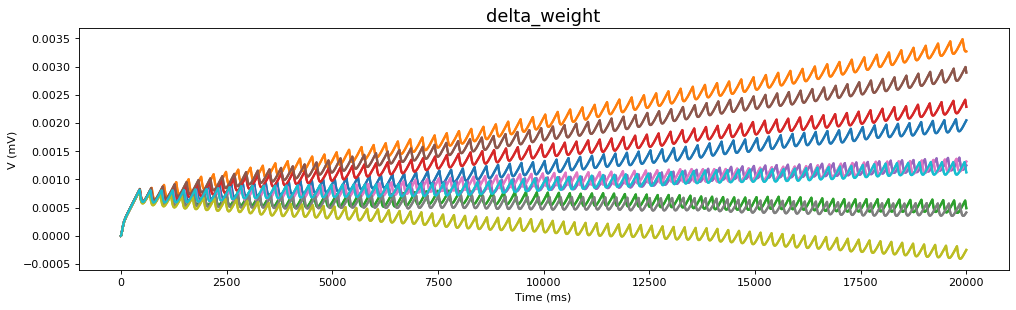

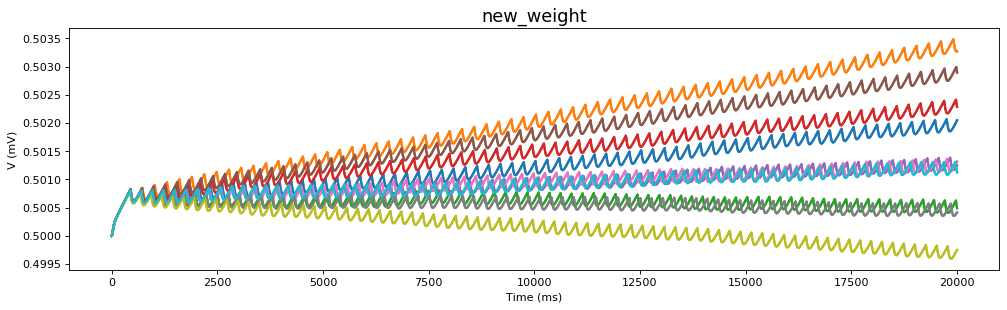

In [7]:
from G_Plot_Plasticity import *

In [8]:
from F_save_data_Plasticity import *

Plasticity variables are saved
Inputs are saved
Voltage Cells are saved
Spike Times are saved
population rates saved


In [9]:
#from G_Plot_Plasticity import *

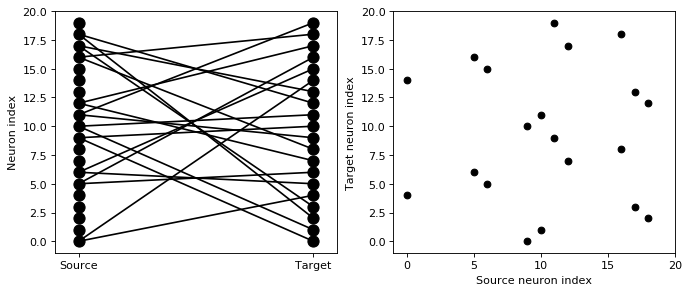

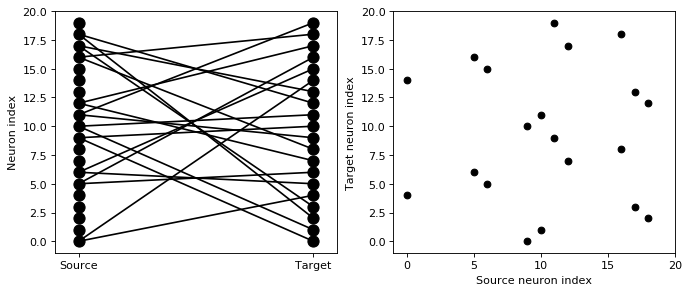

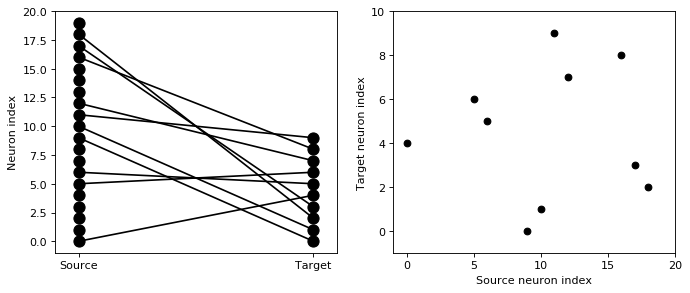

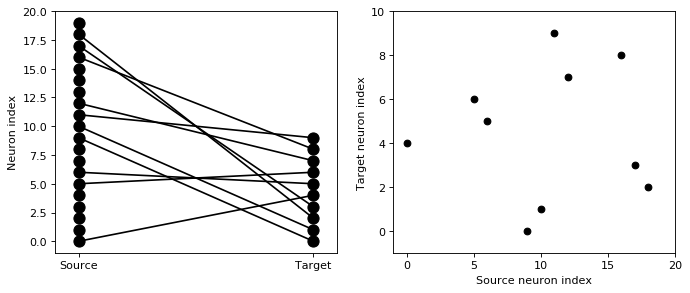

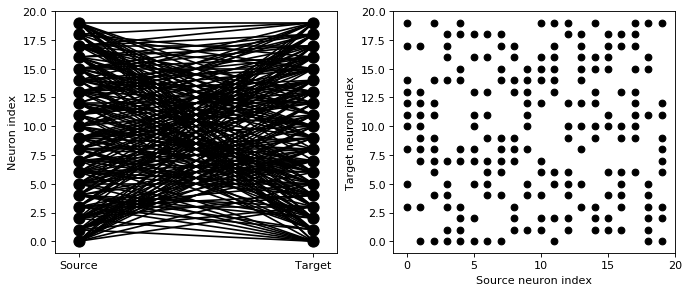

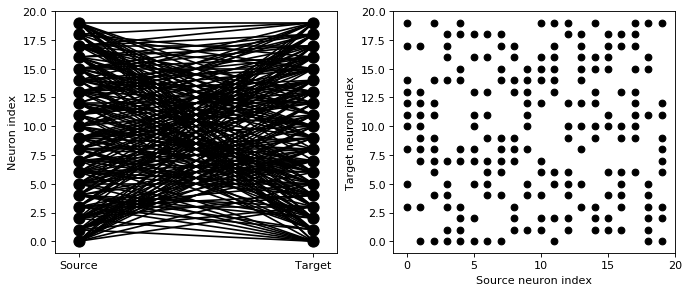

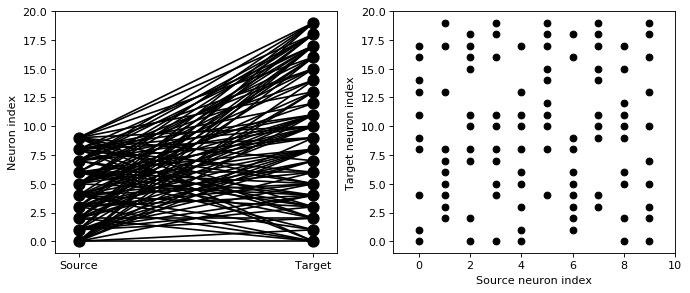

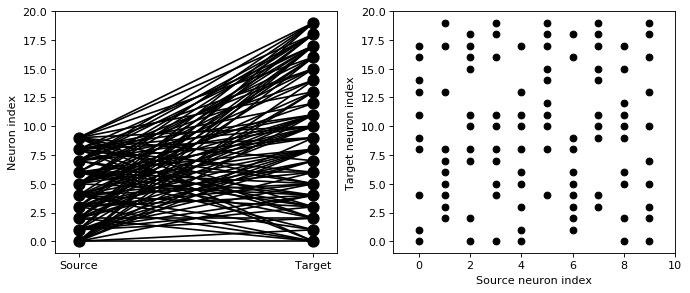

In [10]:
visualise(S_IO_N_Coupled)
visualise(S_IO_N_Uncoupled)

#visualise(Synapse_IO_PC_Coupled_noSTDP)
#visualise(Synapse_IO_PC_Uncoupled_noSTDP)
visualise(Synapse_IO_PC_Coupled_STDP)
visualise(Synapse_IO_PC_Uncoupled_STDP)

#visualise(IO_DCN_Synapse_Coupled_noSTDP)
#visualise(IO_DCN_Synapse_Uncoupled_noSTDP)
visualise(IO_DCN_Synapse_Coupled_STDP)
visualise(IO_DCN_Synapse_Uncoupled_STDP)

#visualise(DCN_PC_Synapse_Coupled_noSTDP)
#visualise(DCN_PC_Synapse_Uncoupled_noSTDP)
visualise(DCN_PC_Synapse_Coupled_STDP)
visualise(DCN_PC_Synapse_Uncoupled_STDP)

In [11]:
from F_save_data_Plasticity import *

<IPython.core.display.Javascript object>


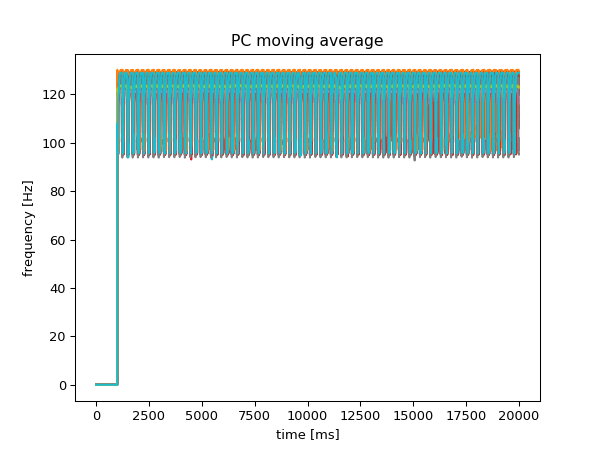

<IPython.core.display.Javascript object>


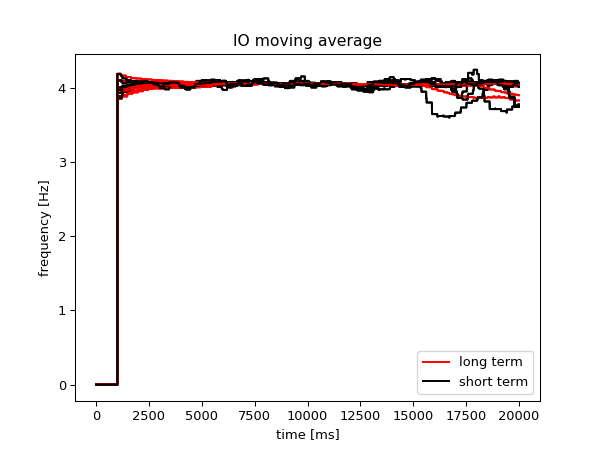

<IPython.core.display.Javascript object>


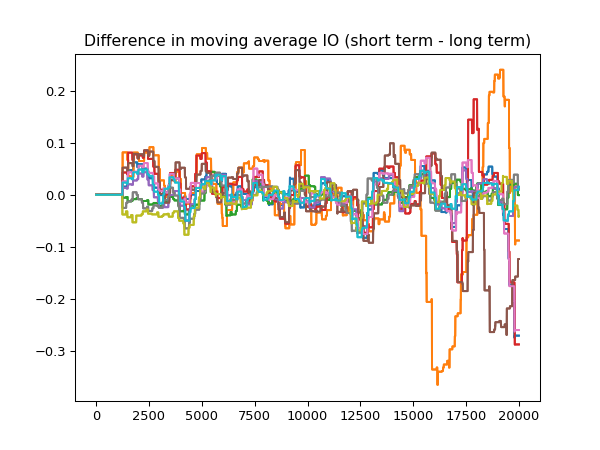

depression % 0.5593157894736842
depression % 0.5199473684210526
depression % 0.39631578947368423
depression % 0.5821052631578948
depression % 0.5072105263157894
depression % 0.5627894736842105
depression % 0.5531578947368421
depression % 0.43157894736842106
depression % 0.41221052631578947
depression % 0.5519473684210526
depression % 0.5593157894736842
depression % 0.5199473684210526
depression % 0.39631578947368423
depression % 0.5821052631578948
depression % 0.5072105263157894
depression % 0.5627894736842105
depression % 0.5531578947368421
depression % 0.43157894736842106
depression % 0.41221052631578947
depression % 0.5519473684210526


<IPython.core.display.Javascript object>


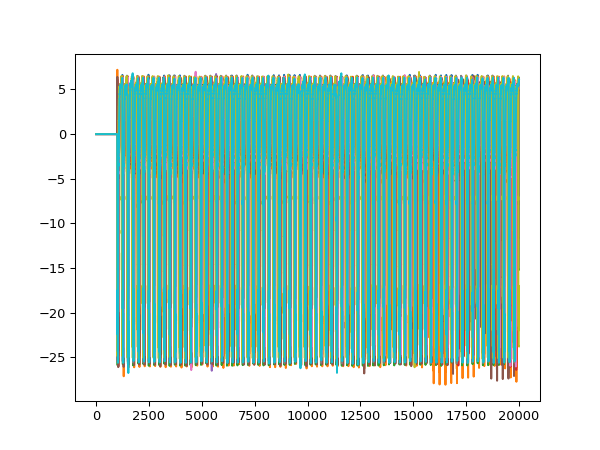

potentiated % 0.6359473684210526
potentiated % 0.6401052631578947
potentiated % 0.6358947368421053
potentiated % 0.6353157894736842
potentiated % 0.6360526315789473
potentiated % 0.6396842105263157
potentiated % 0.6355263157894737
potentiated % 0.6362631578947369
potentiated % 0.6356842105263157
potentiated % 0.6358421052631579
(20, 20000)


In [16]:
%matplotlib notebook

plt.figure()
plt.title('PC moving average')
for k in range(0,10):
    plt.plot(mon_N_PC_Coupled.f_lt_PC[k])
    plt.plot(mon_N_PC_Coupled.f_st_PC[k])
plt.xlabel('time [ms]')
plt.ylabel('frequency [Hz]')
plt.show()
plt.figure()
plt.title('IO moving average')
for p in range(0,n_IO):
    plt.plot(mon_N_PC_Coupled.f_lt_IO[p],color='red')
    plt.plot(mon_N_PC_Coupled.f_st_IO[p], color='black')
plt.legend(['long term','short term'])
plt.xlabel('time [ms]')
plt.ylabel('frequency [Hz]')

plt.figure()
plt.title('Difference in moving average IO (short term - long term)')
for p in range(0,n_IO):
    difio=mon_N_PC_Coupled.f_st_IO[p]-mon_N_PC_Coupled.f_lt_IO[p]
    idxio = (difio>0).astype(float)
    procentage_LTD = sum(idxio)/19000
    print('depression %',procentage_LTD)
    plt.plot(mon_N_PC_Coupled.f_st_IO[p]-mon_N_PC_Coupled.f_lt_IO[p])
plt.figure()
for p in range(0,10):
    dif=mon_N_PC_Coupled.f_st_PC[p]-mon_N_PC_Coupled.f_lt_PC[p]
    idx = (dif>0).astype(float)
    #plt.plot(idx)
    #plt.ylim([0,1.1])
    procentage_LTP = sum(idx)/19000
    plot(dif)
    print('potentiated %',procentage_LTP)
print(mon_N_PC_Coupled.f_lt_IO.shape)

In [17]:
plt.figure()
plt.plot(1/stat.isi(SpikeTimes['IO_coupled'][k]))

0.09